<a href="https://colab.research.google.com/github/victorijsn/imersaodados3/blob/main/20210503_Aula01_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Respostas aos desafios da aula 01 - ImersaoDados - Alura
Victor Nunes Toscano

Linkedin: https://www.linkedin.com/in/vntoscano/

Data: 03/05/2021

## Contexto

Primeiro contato com Python e a famosa biblioteca Pandas, utilizando diversas funcionalidades da mesma para explorar dados do ramo de Drug Discovery. Ainda sem muita informação sobre a base de dados, mas já podendo explorar um pouco as funcionalidades da linguagem.

Pontos importantes:
- Trata-se de um experimento com culturas de célula, em que se administra um medicamento e avalia-se o resultado nas cadeias do DNA da célula.
- Os experimentos dividem-se em tratamento e controle para comparabilidade dos efeitos e determinação da eficiência e eficácia do tratamento.


## Desafios:

1. Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?
2. Desafio 02: Plotar as 5 últimas linhas da tabela
3. Desafio 03: Proporção das classes tratamento.
4. Desafio 04: Quantos tipos de drogas foram investigados.
5. Desafio 05: Procurar na documentação o método query(pandas). 
6. Desafio 06: Renomear as colunas tirando o hífen. 
7. Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)
8. Desafio 08: Resumo do que você aprendeu com os dados

Importar a biblioteca [pandas](https://pandas.pydata.org/docs/index.html) a base de dados:

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

### Resposta 01
#### Investigar por que a classe tratamento é tão desbalanceada?

Reposta: O mais correto é pesquisar na documentação do experimento. Como temos que supor o porquê desse desbalanceamento, vamos olhar algumas informações sobre quais drogas foram utilizadas.

Para realização de experimentos geralmente necessitamos de uma amostra de controle que seja possível a comparação dos resultados obtidos.

Na **Resposta 04** abaixo, é possível observar que a droga "cacb2b860" foi utilizada como controle obtendo o número de 1.866 culturas, exatamente o mesmo número de culturas marcadas com o tipo de tratamento "com_controle". Para conferir isso, faço uma consulta para verificar se há alguma observação com resultado "com_droga" nesta amostra.



In [ ]:
conferencia = dados.query("droga=='cacb2b860'")
conferencia['tratamento'].value_counts()

com_controle    1866
Name: tratamento, dtype: int64

Conforme observado, a droca "cacb2b860" foi utilizada como controle. Nada impede de utilizar a mesma cultura como controle das mais de 3288 drogas experimentais utilizadas no teste. O importante é que hajam cultura suficientemente semelhantes para que se possam comparar os resultados. Ainda observando a distribuição das drogas administradas é possível perceber que a segunda droga mais aplicada no experimento (a droga 87d714366) tem 718 culturas, logo bastariam que houvesse a mesma quantidade de culturas de controle para comparar os efeitos da droga.

### Resposta 02
#### Plotar as 5 últimas linhas da tabela



In [ ]:
dados.tail(5)

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### Resposta 03
##### Proporção das classes tratamento.

In [ ]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

### Resposta 04
#### Quantos tipos de drogas foram investigados?

In [ ]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
ffe357f8f       1
dac782c74       1
89ced6383       1
4a8eda087       1
161572520       1
Name: droga, Length: 3289, dtype: int64

Essa análise foi a que mais me trouxe *insights* sobre as possibilidades de respostas para a primeira pergunta. Acho que existem outras formas de responder ao desafio, mas as informações fornecidas foram muito úteis, especialmente a identificação da droga utilizada como controle no experimento.

### Resposta 05
#### Procurar na documentação o método query(pandas).
Usando o comando query para separ em uma base de dados diferente as linhas cuja droga administrada foi "cacb2b860" e foi utilizada a dose "D1".

In [ ]:
dados_filtrados = dados.query("droga=='cacb2b860' & dose=='D1'")
dados_filtrados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
81,id_00d575cfb,com_controle,72,D1,cacb2b860,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,...,0.3165,0.8022,0.1616,0.8595,0.4876,0.1097,0.0081,-0.6587,0.5827,0.2251,0.6176,0.6843,0.9145,1.3380,0.6787,0.7435,0.1605,0.4481,0.4498,0.4385,-0.5959,0.5739,-0.0054,0.7326,0.7097,1.2800,-0.1287,-0.9125,0.4801,0.5753,0.6761,0.0756,0.7310,-0.7471,0.5367,0.9574,0.6034,0.8906,1.0350,0.5739
148,id_01b05de6c,com_controle,48,D1,cacb2b860,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,...,1.0510,0.3862,0.1679,-0.1606,0.7098,-0.2421,0.7089,-0.1834,0.3628,0.3475,-0.4740,0.3952,0.1573,1.7930,0.3352,0.7680,0.6317,0.3930,0.1769,0.6985,0.9422,1.4140,0.9016,0.0636,0.8527,0.9618,0.8359,0.8941,0.3700,0.1103,0.2189,-0.6163,0.8001,0.3389,0.7437,0.7533,0.2406,0.5057,0.8017,1.0280
175,id_01f1c58a2,com_controle,72,D1,cacb2b860,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,...,0.6429,0.5853,-0.0248,0.0542,-0.1759,-0.3651,0.1489,0.8596,-0.1800,0.2487,-0.0360,0.1250,-0.2602,-0.1255,0.9568,0.6983,0.1060,-0.3538,0.4958,0.0294,0.6751,0.2708,-0.0566,-0.4257,-0.2006,-0.1943,-0.0939,-0.2093,-0.4482,0.2369,-0.6161,-0.5769,-0.0134,-0.5042,-0.7806,0.1024,0.2932,0.7680,-0.1686,0.1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23621,id_fdc4f483b,com_controle,24,D1,cacb2b860,-0.1509,-0.1002,0.3411,0.1356,-1.2440,0.0486,0.7419,-1.3730,0.7722,1.7580,0.8729,-1.0730,1.0730,-1.4150,0.5475,-0.4094,1.4360,0.6273,-0.2553,0.1235,0.7541,-0.2464,0.1359,-0.0386,-1.1960,0.9878,-0.0969,0.4715,0.2

### Resposta 06
#### Renomear as colunas tirando o hífen.

In [ ]:
 dados.columns = dados.columns.str.replace('-','_')
 dados.head()


,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Resposta 07
#### Deixar os gráficos bonitões. (Matplotlib.pyplot)



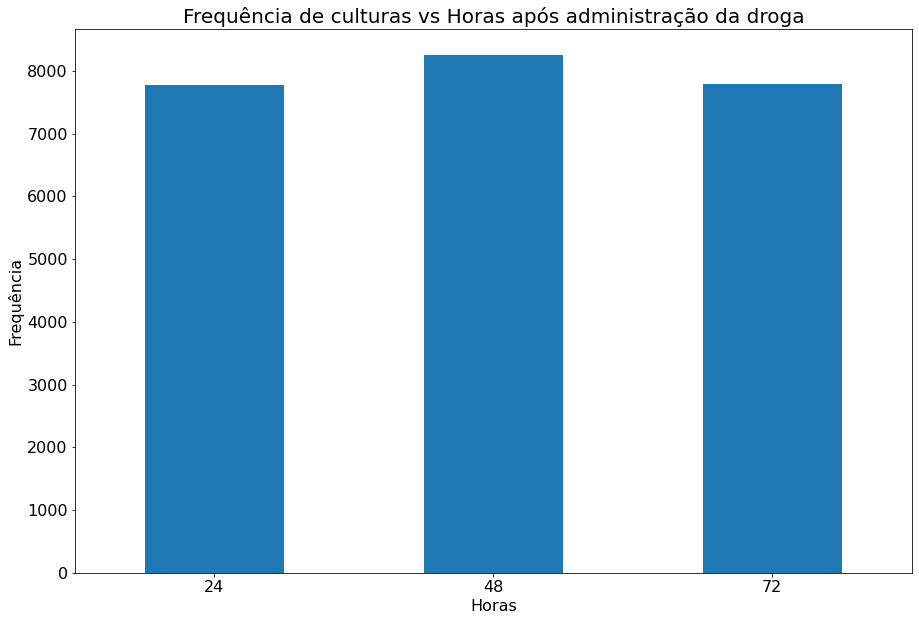

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
dados['tempo'].value_counts().sort_index().plot.bar(0)
plt.title("Frequência de culturas vs Horas após administração da droga", fontsize=20)
plt.xlabel("Horas", fontsize=16)
plt.ylabel("Frequência", fontsize=16)
plt.xticks(rotation = 0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Resposta 08
#### Resumo de aprendizado:
1. Aprendi utilizar o Google colab para aprendizado dinâmico e sem problemas de compatibilidade e de sistema operacional (excelente ferramenta!);
2. Importar as bibliotecas utilizadas na análise exploratória do Python;
3. Importar dados por meio da biblioteca Pandas. 
4. Comandos básicos para manipulação e exploração da base de dados utilizadas: identificação de elementos únicos, contagem de valores e visualização dos dados;
5. Plotagem de gráficos simples para identificar a distribuição dos dados;
6. Operações com strings e nomes da base de dados utilizando o comando str.replace;
7. Como utilizar a função query para filtrar e consultar as Bases de Dados.